In [32]:
import numpy as np
import scipy.stats
import pickle
import time

startTime=time.time()
# Load the saved ARIMA model from the file
with open('mean_Latency_model.pkl', 'rb') as file:
    mean_loaded_model = pickle.load(file)
with open('std_Latency_model.pkl', 'rb') as file:
    std_loaded_model = pickle.load(file)



In [38]:
minute=5
fiveSecondFromMinute=minute*12
# Make predictions using the loaded model
prediction_time=int((time.time()-startTime)/5)
print(prediction_time)
mean_pred = mean_loaded_model.predict(prediction_time,prediction_time+fiveSecondFromMinute)
std_dev_pred = std_loaded_model.predict(prediction_time, prediction_time+fiveSecondFromMinute)

# Define threshold and time interval
threshold = 6


# Calculate cumulative probabilities for each time step within the interval
cumulative_probabilities = []
for mean, std_dev in zip(mean_pred[:], std_dev_pred[:]):
    probability = scipy.stats.norm.cdf(threshold, loc=mean, scale=std_dev)
    cumulative_probabilities.append(probability)

print(cumulative_probabilities)
cumulative_probabilities=np.array(cumulative_probabilities)
cumulative_probabilities = cumulative_probabilities[~np.isnan(cumulative_probabilities)]

# Combine probabilities (e.g., take the maximum)
combined_probability =1- np.prod(cumulative_probabilities)
combined_probability_max=np.max(1-cumulative_probabilities)
meanValuePredicted=np.mean(mean_pred)
print(f"Probability of exceeding 1 time '{threshold} second' of latency in {minute} minute: {combined_probability*100:.6f}%")
print(f"Max instant Probability of exceeding {threshold} second of latency in {minute} minute: {combined_probability_max*100:.6f}%")
print(f"Mean value predicted in {minute} minute: {meanValuePredicted:.2f} s")


0
[nan, 0.9164131631906712, 0.9164230611264235, 0.9164160290852514, 0.9164516042504915, 0.9164170697697946, 0.9178271263315223, 0.9183520560593523, 0.9178896399860441, 0.9181066926800137, 0.9179357494663367, 0.9179706364076535, 0.917965407250709]
Probability of exceeding 1 time '6 second' of latency in 1 minute: 64.485655%
Max instant Probability of exceeding 6 second of latency in 1 minute: 8.358684%
Mean value predicted in 1 minute: 3.86 s


Text(0, 0.5, 'Latency (s)')

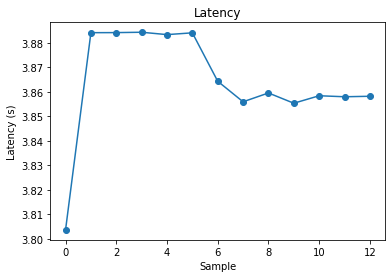

In [34]:
from matplotlib import pyplot as plt


plt.plot(mean_pred, marker='o')
plt.title('Latency')
plt.xlabel('Sample')
plt.ylabel('Latency (s)')